# Домашнее задание 2 (30 + 20 + 25 + 30 = 105 pts )

## Задача 1 (30 pts)

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

- (2 pts) Какова сложность наивного вычисления $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{2}{1000},\frac{3}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-5}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.

- (5 pts) Рассмотрим систему линейных уравнений вида $(I + uu^{\top})x = b$, $u \neq 0$. За сколько итераций сойдётся метод сопряжённых градиентов для этой системы? Получите ответ аналитически, псле чего приведите экспериментальное подтверждение его правильности.

- (5 pts) Покажите, как связан детерминант матрицы
$$
\begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix}
$$

с полиномом Чебышёва степени $n$

### 1).
Докажем два вспомогательных равенства

- $\mathrm{vec}(AB) = (I \otimes A)\, \mathrm{vec}(B)$
- $\mathrm{vec}(XB) = (B^\top \otimes I)\, \mathrm{vec}(X)$

$B = [b_1 ... b_n],\  b_i$ - iй столбец матрицы $B$

$AB = [Ab_1 ... Ab_n] \Rightarrow \mathrm{vec}(AB) = \begin{bmatrix}
Ab_1 \\
Ab_2  \\
\vdots  \\
Ab_n 
\end{bmatrix}$



$I \otimes A = \begin{bmatrix}
A & 0 & \ldots & 0 & 0\\
0 & A & \ldots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & A & 0 \\
0 & 0 & \ldots & 0 & A
\end{bmatrix}, \ \ \mathrm{vec}(B) \begin{bmatrix}
b_1 \\
b_2  \\
\vdots  \\
b_n 
\end{bmatrix} \Rightarrow (I \otimes A)\, \mathrm{vec}(B) = \begin{bmatrix}
Ab_1 \\
Ab_2  \\
\vdots  \\
Ab_n 
\end{bmatrix} = \mathrm{vec}(AB)$




$XB = [Xb_1 ... Xb_n]$, тогда $j$-й столбец матрицы $XB = Xb_j = \begin{bmatrix}
\sum_{i} x_{1i} b_{ij} \\
\sum_{i} x_{2i} b_{ij}  \\
\vdots  \\
\sum_{i} x_{ni} b_{ij} 
\end{bmatrix}= \sum_{i} x_i b_{ij}$, где $x_i-$ $i$-й столбец $X$

$\Rightarrow \mathrm{vec}(XB) = \begin{bmatrix}
\sum_{i} x_{i} b_{i1} \\
\sum_{i} x_{i} b_{i2}  \\
\vdots  \\
\sum_{i} x_{i} b_{in} 
\end{bmatrix}$

C другой стороны, $\mathrm{vec}(XB) = (B^\top \otimes I)\, \mathrm{vec}(X) = \begin{bmatrix}
b_{11}I & b_{21}I & b_{31}I & \ldots & b_{n1}I\\
b_{12}I & b_{22}I & b_{32}I & \ldots & b_{n2}I \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
b_{1n}I & b_{2n}I & b_{3n}I & \ldots & b_{nn}I
\end{bmatrix} \begin{bmatrix}
x_1 \\
x_2  \\
\vdots  \\
x_n 
\end{bmatrix} = \begin{bmatrix}
\sum_{i} x_{i} b_{i1} \\
\sum_{i} x_{i} b_{i2}  \\
\vdots  \\
\sum_{i} x_{i} b_{in} 
\end{bmatrix} = \mathrm{vec}(XB)$

$\mathrm{vec}(AXB) = (I \otimes A)\, \mathrm{vec}(XB) = (I \otimes A) (B^\top \otimes I)\, \mathrm{vec}(X) = 
\begin{bmatrix}
A & 0 & \ldots & 0 & 0\\
0 & A & \ldots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & A & 0 \\
0 & 0 & \ldots & 0 & A
\end{bmatrix} \begin{bmatrix}
b_{11}I & b_{21}I & \ldots & b_{n1}I\\
b_{12}I & b_{22}I & \ldots & b_{n2}I \\
\vdots & \vdots & \vdots & \vdots \\
b_{1n}I & b_{2n}I & \ldots & b_{nn}I
\end{bmatrix} = \begin{bmatrix}
b_{11}A & b_{21}A & \ldots & b_{n1}A\\
b_{12}A & b_{22}A & \ldots & b_{n2}A \\
\vdots & \vdots & \vdots & \vdots \\
b_{1n}A & b_{2n}A & \ldots & b_{nn}A
\end{bmatrix}\, \mathrm{vec}(X) = (B^\top \otimes A)\, \mathrm{vec}(X)$

### 2).

$A \in \mathbb{R}^{m \times n}, B \in \mathbb{R}^{p \times q}, (A \otimes B) \in \mathbb{R}^{mp \times nq}, 
x \in \mathbb{R}^{nq}$

Ечли считать "в лоб", то сначала нужно посчитать $(A \otimes B)$, это требует $O(mnpq)$. Далее полученную матрицу умножить на вектор $x$, это требует также $O(mnpq)$

Можно представить вектор $x$ как векторизацию некоторой матрицы по столбцам, то есть $x = \mathrm{vec}(X), X \in \mathbb{R}^{q \times n}$

Тогда из предыдущего номера получаем $\mathrm{vec}(BXA^\top) = (A \otimes B)\, \mathrm{vec}(X) = (A \otimes B) x$,

то есть достаточно посчитать $BXA^\top$, $C = BX - O(pqn), \ \  CA^\top - O(pnm) \Rightarrow$ итоговая сложность $O(pqn + pnm)$, что существенно лучше, чем $O(mnpq)$

### 3).

Пусть $x_1, ..., x_n$ - собственные векторы матрицы $A$, соответствующие собственным значениям $\lambda_1, ..., \lambda_n$, а $y_1, ..., y_n$ - собственные векторы матрицы $B$, соответствующие собственным значениям $\mu_1, ..., \mu_n$. Докажем, что матрица $A\otimes I + I \otimes B$ имеет собственный вектор $y_j \otimes x_i$, соответствующий собственному значению $\lambda_i + \mu_j$.

$(A\otimes I)(y_j \otimes x_i) = \begin{bmatrix}
A & 0 & \ldots & 0 & 0\\
0 & A & \ldots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & A & 0 \\
0 & 0 & \ldots & 0 & A
\end{bmatrix} \begin{bmatrix}
y_{1j} x_i \\
y_{2j} x_i \\
\vdots  \\
y_{n-1 j} x_i \\
y_{nj} x_i \\
\end{bmatrix} = \begin{bmatrix}
y_{1j} Ax_i \\
y_{2j} Ax_i \\
\vdots  \\
y_{n-1 j} Ax_i \\
y_{nj} Ax_i \\
\end{bmatrix} = \begin{bmatrix}
y_{1j} \lambda_i x_i \\
y_{2j} \lambda_i x_i \\
\vdots  \\
y_{n-1 j} \lambda_i x_i \\
y_{nj} \lambda_i x_i \\
\end{bmatrix} = \lambda_i (y_j \otimes x_i)$

$(I \otimes B)(y_j \otimes x_i) = \begin{bmatrix}
b_{11}I & b_{12}I & \ldots & b_{11}I & b_{1n}I\\
b_{21} & b_{22}I & \ldots & b_{11}I & b_{2n}I\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
b_{n-1 1}I & b_{n-1 2}I & \ldots & b_{n-1 n-1}I & b_{n-1 n}I \\
b_{n1}I & b_{n2}I & \ldots & b_{n n-1}I & b_{nn}I
\end{bmatrix} \begin{bmatrix}
y_{1j} x_i \\
y_{2j} x_i \\
\vdots  \\
y_{n-1 j} x_i \\
y_{nj} x_i \\
\end{bmatrix} = \begin{bmatrix}
\sum_{k} x_{i} b_{1k} y_{kj} \\
\sum_{k} x_{i} b_{2k} y_{kj} \\
\vdots  \\
\sum_{k} x_{i} b_{nk} y_{kj}
\end{bmatrix} = \begin{bmatrix}
x_i \sum_{k} b_{1k} y_{kj} \\
x_i \sum_{k} b_{2k} y_{kj} \\
\vdots  \\
x_i \sum_{k} b_{nk} y_{kj}
\end{bmatrix} = \begin{bmatrix}
\mu_j y_{1j} x_i \\
\mu_j y_{2j} x_i \\
\vdots  \\
\mu_j y_{n-1 j} x_i \\
\mu_j y_{nj} x_i \\
\end{bmatrix} = \mu_j (y_j \otimes x_i)$

$\Rightarrow (A\otimes I + I \otimes B)(y_j \otimes x_i) = (\lambda_i + \mu_j)(y_j \otimes x_i) \ \ \forall i, j$

### 4).

Для метода Ричардсона справедлива следующая оценка $\quad\left\|e_{k}\right\|_{2} \leq q^{k}\left\|e_{0}\right\|_{2}$, где $q = \frac{\mathrm{cond}(A)-1}{\mathrm{cond}(A)+1}$

$q = \frac{10^6 - 2}{10^6 + 2} \approx 0.999996, \ \  q^k = 10^5 \Rightarrow k = log_q (10^5) = \frac{ln(10^5)}{ln(q)} \approx 287823 \ \ итераций$

Для метода Ричардсона справедлива следующая оценка $\quad\left\|e_{k}\right\|_{2} \leq q^{k}\left\|e_{0}\right\|_{2}$, где $q = \frac{\mathrm{\sqrt {cond}}(A)-1}{\mathrm{\sqrt {cond}}(A)+1}$

$q = \frac{10^3 - \sqrt2}{10^3 + \sqrt2} \approx 0.99717556722, \ \  q^k = 10^5 \Rightarrow k = log_q (10^5) = \frac{ln(10^5)}{ln(q)} \approx 4070 \ \ итераций$

Для метода сопряженных градиентов справедлива следующая оценка $\frac{\Vert x - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \inf_{q, q(0)=1} \max_{j} |q({\lambda_j})|.$

Среди собственных значений присутстует один выброс - $1000$, остальные собственные значения сосредоточены на отрезке $[0,1]$. Как отмечалось на лекции, если собственные значения кластеризованы и имеется $l$ выбросов, тогда после первых $\mathcal{O}(l)$ итераций CG сойдётся как будто этих выбросов не было (следовательно, эффективное число обусловленности меньше). Интуитивное объяснение этого факта в том, что после $\mathcal{O}(l)$ итераций полином имеет степень больше чем $l$ и таким образом зануляет $l$ выбросов. Значит после нескольких первых итераций, CG сойдется так, как если бы все собственные значения были $[0.002, 0.003, ..., 1]$. При этом известно, что SG сходится не хуже метода Чебышева, поэтому $\frac{\Vert x_k - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \gamma \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}\right)^k.$, при этом здесь уже число обусловленности отличается от числа обусловленности исходной матрицы и равно $\frac{1}{0.002} = 500$ 

$q = \frac{\sqrt{500}-1}{\sqrt{500}+1} \approx 0.914386053 \Rightarrow k = log_q (10^5) = \frac{ln(10^5)}{ln(q)} \approx 128 \ \ итераций$

### 5).

Возьмем произвольный вектор $x$, ортогональный вектору $u$. Тогда $(I + uu^{\top})x = x + u (u, x) = x$

То есть существует $n-1$ линейно независимых собственных векторов, соответствующих собственному значению $1$

Далее возьмем вместо $x$ вектор $u$. $(I + uu^{\top})u = u + u \|u\|_2 = (1 + \|u\|_2) u$.

При этом $(1 + \|u\|_2) \neq 1$, так как $u \neq 0$.

Значит у матрицы $(I + uu^{\top})$  всего два различных собственных значения: $1, \ (1 + \|u\|_2)$.

Утверждение с лекции: если матрица имеет только 2 различных собственных значения, тогда существует полином степени 2 такой что $q({\lambda_1}) = q({\lambda_2}) = 0$, и в этом случае CG сходится за 2 итерации.

Поэтому метод сопряженных градиентов должен сойтись за 2 итерации. Проверим экспериментально

In [ ]:
u = np.random.rand(20)
A = np.eye(20) + u @ u.T

In [ ]:
x = np.random.rand(20)
b = A @ x

In [ ]:
res_hist = []
def callback(x):
    res_hist.append(np.linalg.norm(A @ x - b) / np.linalg.norm(b))
    
x, info = spsplin.cg(A, b, maxiter=n, tol=1e-10, callback=callback)
#print(np.linalg.norm(A @ x - b))
#print(info)
print(len(res_hist))
print(res_hist)
x_lu = np.linalg.solve(A, b)
#print(np.linalg.norm(A @ x_lu - b))

2
[0.0049153965968704565, 2.6428202451480892e-14]


Видим, что эксперименты подтвердили теоретическую оценку, метод сошелся всего за 2 итерации

### 6).

Обозначим $D_n(x) = det \begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix}$

Воспользуемся теоремой Лапласа и разложим данный определитель по последней строке:


$D_n(x) = 2x \cdot det \begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix} - det \begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 0 \\
0 & 0 & \ldots & 1 & 1
\end{bmatrix} = $ \{разложим 2й определитель по последенему столбцу\} = 

$= 2x D_{n-1}(x) - D_{n-2}(x)$

При этом $D_1(x) = x, \ D_2(x) = det \begin{bmatrix}
x & 1 \\
1 & 2x
\end{bmatrix} = 2x^2 - 1$

$\Rightarrow D_n(x)$ - многочлен Чебышева $T_n(x)$

#### эксперименты для 4).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline
import scipy as sp
import scipy.sparse as spsp
import scipy.sparse.linalg as spla
import scipy
from scipy.sparse import csc_matrix

In [2]:
import scipy.sparse.linalg as spsplin

In [ ]:
A.shape

(1000, 1000)

In [ ]:
n = 1000
ex = np.arange(0.002, 1.001, 0.001)
ex = np.append(ex, 1000)
A = sp.sparse.spdiags(ex, [0], n, n, 'csr')
rhs = np.ones(n)

In [ ]:
A

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [ ]:
A.toarray()

array([[2.00e-03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 3.00e-03, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 4.00e-03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 9.99e-01, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+03]])

In [ ]:
np.array(A.sum(axis=1)).ravel()

array([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008])

In [ ]:
A.toarray()

array([[2.00e-03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 3.00e-03, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 4.00e-03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 9.99e-01, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+03]])

[   0 1023  511 ...  853  341  682] 1024


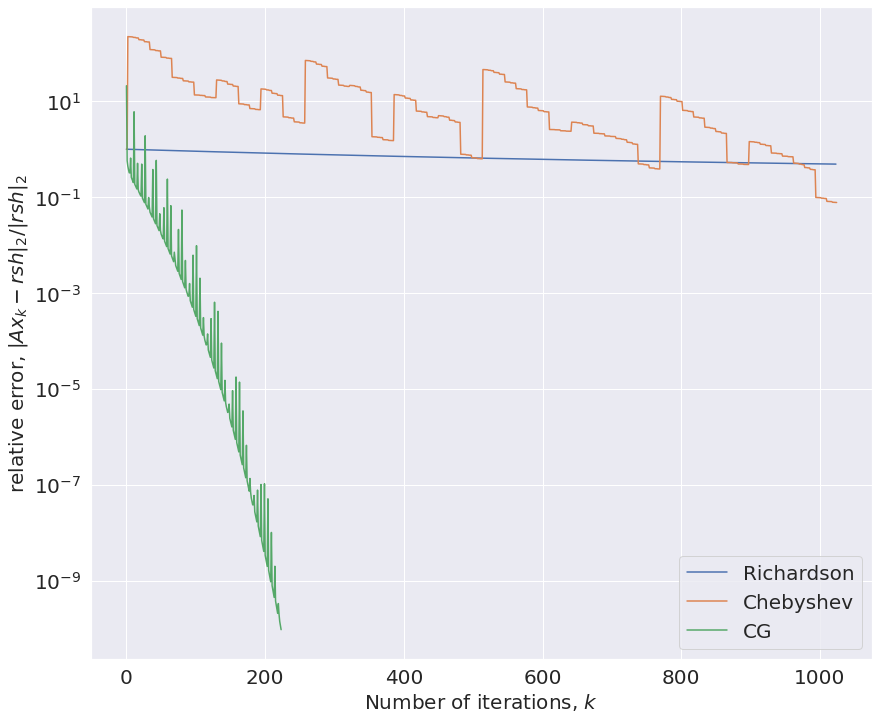

In [ ]:
n = 1000
lam_max = 1000.0
lam_min = 0.002
niters = 1024


tau_opt = 2.0/(lam_max + lam_min)

niters = 1024
x = np.zeros(n)
res_richardson = []
for i in range(niters):
    rr = A.dot(x) - rhs
    x = x - tau_opt * rr
    res_richardson.append(np.linalg.norm(rr)/np.linalg.norm(rhs))

roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = np.zeros(n)
r = A.dot(x) - rhs
res_cheb_even = [np.linalg.norm(r)/np.linalg.norm(rhs)]
#print(taus)

# Implementation may be non-optimal if number of iterations is not power of two
def leb_shuffle_2n(n):
    if n == 1:
        return np.array([0,], dtype=int)
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans

good_perm_even = leb_shuffle_2n(niters)
print(good_perm_even, len(good_perm_even))
# good_perm_even = np.random.permutation([i for i in range(niters)])

for i in range(niters):
    x = x - 1.0/taus[good_perm_even[i]] * r
    r = A.dot(x) - rhs
    res_cheb_even.append(np.linalg.norm(r)/np.linalg.norm(rhs))
    

res_hist = []
def callback(x):
    res_hist.append(np.linalg.norm(A @ x - rhs) / np.linalg.norm(rhs))
    
x, info = spsplin.cg(A, rhs, maxiter=niters, tol=1e-10, callback=callback)


plt.figure(figsize=(14, 12))
plt.semilogy(res_richardson, label="Richardson")
plt.semilogy(res_cheb_even, label="Chebyshev")
plt.semilogy(res_hist, label="CG")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("relative error, $\|Ax_k - rsh\|_2 / \|rsh\|_2$", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

## Задача 2 (20 pts)

### Спектральное разбиение графа и обратная итерация


Дан связный граф $G$ и соответствующий ему лапласиан $L = D - A$ с собственными значениями  $0=\lambda_1, \lambda_2, ..., \lambda_n$, где $D$ диагональная матрица со степенями вершин на диагонали, а $A$ – матрица смежности.
Вектор Фидлера – это собственный вектор, соответствующий собственному значению $\lambda_2$ матрицы $L$. Этот вектор может быть использован для разбиения графа: положительные значения соответствуют одной части графа, отрицательные – другой.

### Метод обратной итерации

Для поиска вектора Фидлера мы будем использовать метод Релея.

* (10 pts) Выпишите матрицу ортопроектора на подпространство ортогональное собственному вектору матрице $L$, соответствующему собственному значению $0$ и докажите (аналитически), что это действительно ортопроектор.
 
* (5 pts) Реализуйте функцию спектрального разделения графа ```partition```:

В матрице Лапласа строчные суммы равны нулю, поэтому собственным вектором, соответствующим собственному значению 0, является вектор $y = (1, 1, ..., 1)^T$. Пусть $E$ - подпространство ортогональное вектору $y$. Тогда $\forall x \in E \rightarrow (x, y) = 0 \Rightarrow x_1 + x_2 + ... + x_n = 0$. Данная ситсема линейных уравнений задает пространство $E$. Поэтому фундаментальная система решений этой системы является базисом в $E$. $dimE = n - rank(A)$, где $A$ - матрица системы, поэтому $dimE = n - 1$. Заметим, что векторы $x_1 = (1, -1, 0, 0, ..., 0)^T, x_2 = (1, 0, -1, 0, ..., 0)^T, ..., x_{n-1} = (1, 0, 0, 0, ... , -1)^T$ являются базисом в $E$.

Пусть $P$ - линейный оператор ортогональной проекции на подпространство $E$, тогда матрица данного оператора в базисе $f = (x_1, x_2, ..., x_{n-1}, y) \ \ P_f = \begin{bmatrix}
1 & 0 & \ldots & 0 & 0\\
0 & 1 & \ldots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 1 & 0 \\
0 & 0 & \ldots & 0 & 0
\end{bmatrix}$

Найдем матрицу $P$ в стандартном базисе $e = (e_1, e_2, ..., e_n), e_1 = (1, 0, 0, ..., 0)^T, e_2 = (0, 1, 0, .., 0)^T, ..., e_n = (0, 0, 0, ..., 1)^T$.

Чтобы найти $i-$й столбец матрицы $P_e$, нужно записать $e_i$ в базисе $f$, умножить матрицу $P_f$ на вектор из координат, полученный вектор разложить по базису $e$, и столбец из координат и будет $i-$м столбцом матрицы $P_e$.

$(e_1)_f = (\frac{1}{n}, \frac{1}{n}, ..., \frac{1}{n})^T, (e_2)_f = (\frac{1}{n} - 1, \frac{1}{n}, ..., \frac{1}{n})^T, (e_3)_f = (\frac{1}{n}, \frac{1}{n} - 1, ..., \frac{1}{n})^T, ..., (e_n)_f = (\frac{1}{n}, \frac{1}{n}, ..., \frac{1}{n} - 1)^T$


$
P_fe = \begin{bmatrix}
1 & 0 & \ldots & 0 & 0\\
0 & 1 & \ldots & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 1 & 0 \\
0 & 0 & \ldots & 0 & 0
\end{bmatrix} \begin{bmatrix}
\frac{1}{n} & \frac{1}{n} - 1 & \ldots & \frac{1}{n} & \frac{1}{n}\\
\frac{1}{n} & \frac{1}{n} & \ldots & \frac{1}{n} & \frac{1}{n}\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\frac{1}{n} & \frac{1}{n} & \ldots & \frac{1}{n} & \frac{1}{n} - 1 \\
\frac{1}{n} & \frac{1}{n} & \ldots & \frac{1}{n} & \frac{1}{n}
\end{bmatrix} = \begin{bmatrix}
\frac{1}{n} & \frac{1}{n} - 1 & \ldots & \frac{1}{n} & \frac{1}{n}\\
\frac{1}{n} & \frac{1}{n} & \ldots & \frac{1}{n} & \frac{1}{n}\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\frac{1}{n} & \frac{1}{n} & \ldots & \frac{1}{n} & \frac{1}{n} - 1 \\
0 & 0 & \ldots & 0 & 0
\end{bmatrix} - $ в столбцах записаны проекции в базисе $f$

$(P_fe_1)_e = (1 - \frac{1}{n}, -\frac{1}{n}, ..., -\frac{1}{n})^T$

$(P_fe_2)_e = (-\frac{1}{n}, 1 - \frac{1}{n}, ..., -\frac{1}{n})^T$

$....$

$(P_fe_n)_e = (-\frac{1}{n}, -\frac{1}{n}, ..., 1 - \frac{1}{n})^T$

Следовательно, матрица оператора в стандартном базисе имеет вид $P_e = \begin{bmatrix}
1 - \frac{1}{n} & -\frac{1}{n} & \ldots & -\frac{1}{n} & -\frac{1}{n}\\
-\frac{1}{n} & 1 - \frac{1}{n} & \ldots & -\frac{1}{n} & -\frac{1}{n}\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
-\frac{1}{n} & -\frac{1}{n} & \ldots & 1 - \frac{1}{n} & -\frac{1}{n} \\
-\frac{1}{n} & -\frac{1}{n} & \ldots & -\frac{1}{n} & 1 - \frac{1}{n}
\end{bmatrix}$

In [3]:
import networkx as nx
from networkx.generators.classic import lollipop_graph

In [39]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (float)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    
    ex = A.sum(axis=1)
    n = A.shape[0]
    D = sp.sparse.spdiags(np.array(ex).ravel(), [0], n, n, 'csr')
    L = D - A
    L1 = L + shift * spsp.eye(n, format="csr")
    
    u = x0 / np.linalg.norm(x0)   # u - ksi, v - eta
    eigs = []
    ans = []
    eig = 0.0001

    
    for i in range(num_iter_fix):
        v = spsplin.spsolve(L1, u)
        y = v - v.dot(np.ones(n)) * np.ones(n) / n
        u_new = y / np.linalg.norm(y)
        eig_new = u_new.T.dot(L1.dot(u_new))
        
        eigs.append(eig)
        ans.append(np.linalg.norm(u_new - u))
        u = u_new
        
        if np.linalg.norm(eig_new - eig) / np.linalg.norm(eig) <= eps:
            return u, eigs, ans
        
        eig = eig_new    
        
    
    for i in range(num_iter_adapt):
        L1 = L - eig * spsp.eye(n, format="csr")
        L1 = spsp.csr_matrix(L1)
        v = spsplin.spsolve(L1, u)
        y = v - v.dot(np.ones((n, n))).dot(np.ones((n, n))) / n
        u_new = y / np.linalg.norm(y)
        eig_new = u_new.T.dot(L1.dot(u_new))
        
        eigs.append(eig)
        ans.append(np.linalg.norm(u_new - u))
        u = u_new
        
        if np.linalg.norm(eig_new - eig) / np.linalg.norm(eig) <= eps:
            return u, eigs, ans
        
        eig = eig_new 
        
    return u, eigs, ans
        

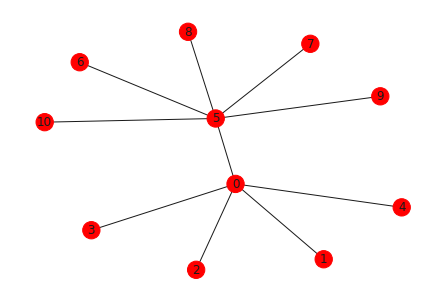

In [ ]:
A = np.zeros((11,11))
A[0,1] = A[0,2] = A[0,3] = A[0,4] = 1
A[5,6] = A[5,7] = A[5,8] = A[5,9] = A[5,10] = 1
A[0,5] = 5

G = nx.from_numpy_matrix(A)
labels = ["red" for i in range(11)]



nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)  

In [ ]:
B = nx.to_scipy_sparse_matrix(G, format="csr")
n = B.shape[0]

u, eigs, ans = partition(B, 0.001, 1000, 1000, np.ones(n), 0.00001)

In [ ]:
u

array([ 0.11819137,  0.36585313,  0.36585313,  0.36585313,  0.36585313,
       -0.09595779, -0.29712922, -0.29712922, -0.29712922, -0.29712922,
       -0.29712922])

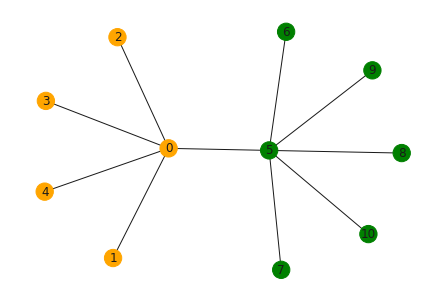

In [ ]:
labels = ["green" if v < 0 else "orange" for v in u]


nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

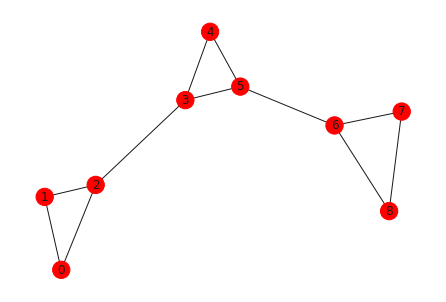

In [ ]:
A = np.array([[0,2,2,0,0,0,0,0,0],
         [2,0,2,0,0,0,0,0,0],
         [2,2,0,1,0,0,0,0,0],
         [0,0,1,0,3,3,0,0,0],
         [0,0,0,3,0,3,0,0,0],
         [0,0,0,3,3,0,1,0,0],
         [0,0,0,0,0,1,0,1,1],
         [0,0,0,0,0,0,1,0,1],
         [0,0,0,0,0,0,1,1,0]])


G = nx.from_numpy_matrix(A)
labels = ["red" for i in range(A.shape[0])]



nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

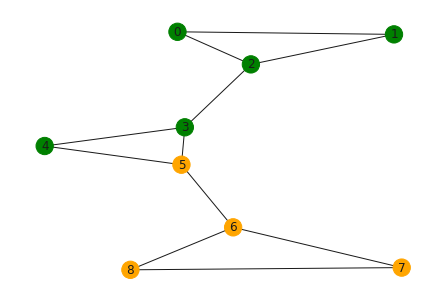

In [ ]:
B = nx.to_scipy_sparse_matrix(G, format="csr")
n = B.shape[0]

u, eigs, ans = partition(B, 0.001, 1000, 1000, np.ones(n), 0.00001)

labels = ["green" if v < 0 else "orange" for v in u]


nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

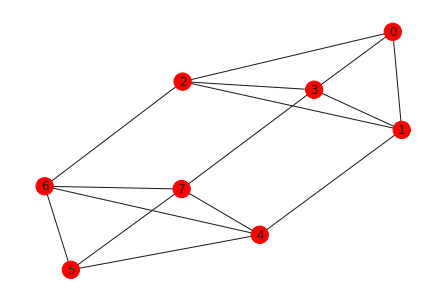

In [ ]:
A = np.array([[0,1,1,1,0,0,0,0],
              [1,0,1,1,1,0,0,0],
              [1,1,0,1,0,0,1,0],
              [1,1,1,0,0,0,0,1],
              [0,1,0,0,0,1,1,1],
              [0,0,0,0,1,0,1,1],
              [0,0,1,0,1,1,0,1],
              [0,0,0,1,1,1,1,0]
              ])


G = nx.from_numpy_matrix(A)
labels = ["red" for i in range(A.shape[0])]



nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

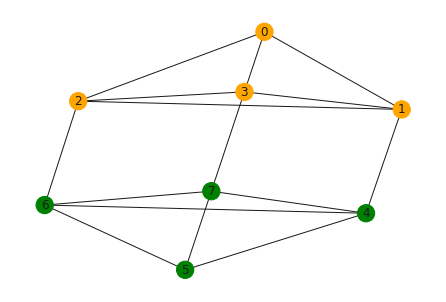

In [ ]:
B = nx.to_scipy_sparse_matrix(G, format="csr")
n = B.shape[0]

u, eigs, ans = partition(B, 0.001, 1000, 1000, np.ones(n), 0.00001)

labels = ["green" if v < 0 else "orange" for v in u]


nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

Алгоритм должен останавливаться спустя `num_iter_fix + num_iter_adapt` итераций или если выполнено следующее соотношение

$$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ на некотором шаге } k.$$

Не забудьте использовать ортогональную проекцию из задачи выше в итерационном процессе, чтобы получить верный собственный вектор.
Также хорошей идеей могло быть использование ```shift=0``` до запуска адаптивного режима. Однако это невозможно в силу вырождннности матрицы $L$, а разреженное разложенное в ```scipy``` не работет в этом случае. Поэтому вместо нулевого сдвига предлагается использовать некоторое малое значение.

* (3 pts) Сгенерируйте случайный `lollipop_graph`, используя библиотеку `networkx`, и найдите его разбиение. [Нарисуйте](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) этот граф с вершинами, окрашенными в соответствии с разбиением.

* (2 pts) Запустите метод со случайного начального приближение ```x0```, установите ```num_iter_fix=0``` и объясните, почему метод может сойтись к неверному собственному значению?

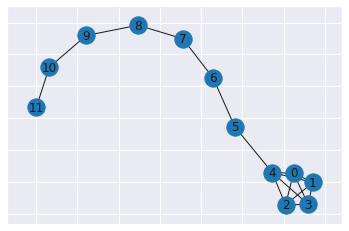

In [ ]:
m, n = 5, 7
G = lollipop_graph(m, n)

nx.draw_networkx(G)

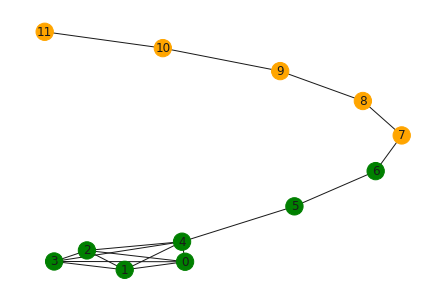

In [ ]:
B = nx.to_scipy_sparse_matrix(G, format="csr")
n = B.shape[0]

u, eigs, ans = partition(B, 0.001, 1000, 1000, np.ones(n), 0.00001)

labels = ["green" if v < 0 else "orange" for v in u]


nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

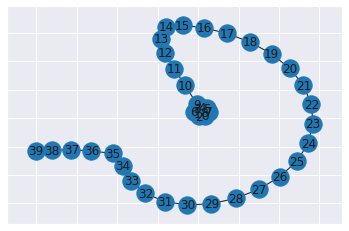

In [ ]:
m, n = 10, 30
G = lollipop_graph(m, n)

nx.draw_networkx(G)

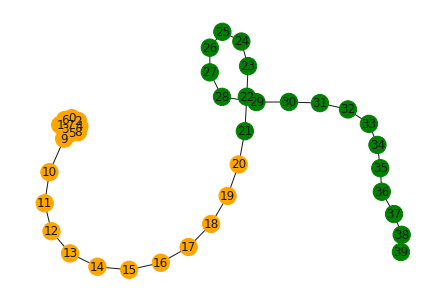

In [ ]:
B = nx.to_scipy_sparse_matrix(G, format="csr")
n = B.shape[0]

u, eigs, ans = partition(B, 0.001, 1000, 1000, np.ones(n), 0.00001)

labels = ["green" if v < 0 else "orange" for v in u]


nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

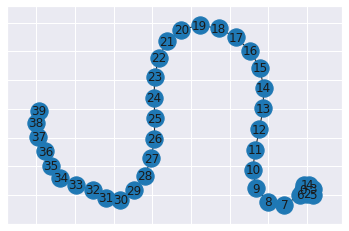

In [5]:
m, n = 7, 33
G = lollipop_graph(m, n)

nx.draw_networkx(G)

In [40]:
B = nx.to_scipy_sparse_matrix(G, format="csr")
n = B.shape[0]

x0 = np.random.rand(n)

u, eigs, ans = partition(B, 0.001, 0, 1000, x0, 0.00001)



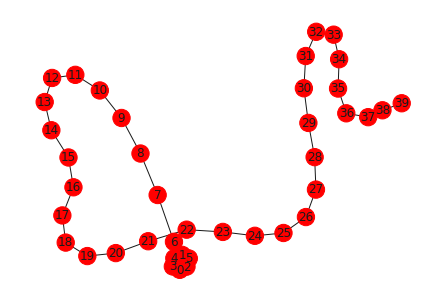

In [42]:
labels = ["green" if v < 0 else "red" for v in u]


nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=True, node_color=labels)

In [43]:
eigs

[0.0001,
 -9.999998378189314e-05,
 9.999998378203473e-05,
 -9.999998378188398e-05,
 9.999998378209026e-05,
 -9.999998378221745e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.999998378232716e-05,
 -9.99999837822394e-05,
 9.9

Видно, что оценки собственных значений чередуются между -9.99999837822394e-05 и 9.999998378232716e-05. Это произошло потому перед тем как использовать степенной метод с адаптацией сдвига, нужно иметь хорошую оценку на соответствующее собственное значение. Эта оценка как раз и находилась степенным методом с фиксированным сдвигом, но в данном случае мы не сделали ни одной итерации метода с фиксированным сдвигом (num_iter_fix=0), поэтому метод в итоге не сошелся

## Задача 3 (25 pts)

## PageRank для DBLP


#### Введение дэмпфирующего фактора

* (5 pts) Напишите функцию ```pagerank_matrix(G)```, которая из поданной на вход матрицы смежности $G$ (в плотном или разреженном форматах) создаёт и возвращает матрицу PageRank'a $A$.

In [ ]:
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
def pagerank_matrix(G):
    if type(G).__module__ == np.__name__:
        A = G.T
        B = np.array(G.sum(axis=1))
        A = A/np.repeat(B, G.shape[0], axis=1).T
    
    else:
        A = G.T
        B = np.array(G.sum(axis=1)).reshape(-1)
        rep = np.diff(G.indptr)
        A.data /= np.repeat(B, rep)
    
    return A

* (5 pts) Реализуйте степенной метод для заданной матрицы $A$, начального вектора $x_0$ и числа итераций```num_iter``` в соответствии с прототипом ниже. Функция возвращает оценку собственного вектора, собственного значения и нормы невязки при сходимости. Проверьте, что ваша реализация сходится для матрицы $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$.

In [ ]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter): # 5 pts
    x = x0.copy()
    res = []
    for i in range(num_iter):
        x_new = A @ x
        x_new = x_new / np.linalg.norm(x_new)
        x = x_new
        l = x @ (A @ x)
        res.append(np.linalg.norm(A @ x - l * x))
        
    return x, l, res

In [ ]:
A = np.array([[2, -1], [-1, 2]])
x0 = np.random.randn(2)
x, l, res = power_method(A, x0, 50)

In [ ]:
x

array([ 0.70710678, -0.70710678])

In [ ]:
l

3.0

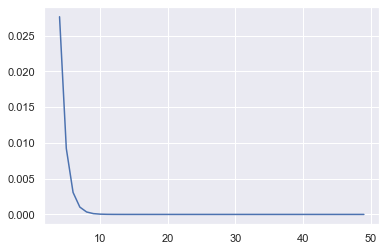

In [ ]:
plt.plot(list(range(len(res)))[4:], res[4:])

In [ ]:
np.allclose(A @ x, 3*x)

True

In [ ]:
np.linalg.eigvals(A)

array([3., 1.])

Для избежания проблем со сходимостью степенного метода, обсуждённых на семинаре, можно ввести дэмпфирующий фактор и преобразовать матрицу PageRank'a следующим образом:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

где $d$ малый параметр из отрезка $[0,1]$ (обычно $d=0.85$), который называется **демпфирующим фактором**, $A$ размера $N\times N$. После такого преобразования максимальное собственное значение матрицы $A_d$ обладает кратностью равной 1. 

Именно это [предложили](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) сделать Ларри Пейдж и Сергей Брин для получения своего алгоритма ранжирвания веб-страниц.


* (4 pts) Реализуйте функцию быстрого умножения матрицы $A_d$ на вектор в соответствии с прототипом ниже ```pagerank_matvec(A, d, x)```. На вход функция принимает  матрицу PageRank'a $A$ (в разреженном формате, например ```csr_matrix```), демпфирующий фактор $d$ и начальный вектор $x$, а возвращает $A_dx$. 

In [ ]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    y = d * A.dot(x) + (1-d)/A.shape[0] * np.sum(x) * np.ones(A.shape[0])
    return y

* (2 pts) Сгенерируйте случайную матрицу смежности $1000 \times 1000$ (если помещается в память, то увеличьте размер до $10000 \times 10000$) со 100 ненулевыми элементами и сравните время вычисления произведения матрицы и случайного вектора с помощью ```pagerank_matvec``` и явным вычислением $A_dx$.
    
Загрузите данные [отсюда](https://goo.gl/oZVxEa), разархивируйте и поместите файлы `dblp_authors.npz`  и `dblp_graph.npz` в папку рядом с этим ноутбуком. Каждое значение (имя автора) из `dblp_authors.npz` соответствует строке/столбцу в матрице из  `dblp_graph.npz`. Значения в строке `i` и столбце `j` матрицы `dblp_graph.npz` соответствуют числу раз, которое автор `i` цитировал статьи автора `j`. Давайте теперь найдём наиболее влиятельных авторов по величине Pagerank'a на основе данных DBLP.

* (5 pts) Загрузите взвешенную матрицу смежности и список авторов с помощью функции ```load_dblp(...)```. Выведите её плотность, то есть отношение числа ненулевых элементов к общему числу элементов. Найдите top-10 наиболее цитируемых авторов по значениям элементов этой матрицы. Далее сделайте все элементы равными 1 для простоты. Получите матрицу Pagerank'a из матрицы смежности и проверьте её стохастичность (сумма элементов по строкам/столбцам равна 1).
 
* (1 pts) Для того чтобы передать функцию ```pagerank_matvec``` в функцию ```power_method``` для быстрого вычисления матрично-векторного произведения $A_dx$, вы можете сделать ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Вызов ```L@x``` или ```L.dot(x)``` будет реализован путём вызова функции ```pagerank_matvec(A, d, x)```, таким образом, вы можете передать $L$ вместо матрицы $A$ в функцию ```power_method``` напрямую.


* (2 pts) Запустите степенной метод начиная с вектора из всех 1 и нарисуйте норму невязок $\|A_dx_k - \lambda_k x_k\|_2$  как функцию от $k$ для $d=0.85$.


* (1 pts) Выведите имена top-10 авторов по величине PageRank'a на основании графа DBLP с $d=0.85$. Прокомментируйте результат и сарвните его со списком наиболее цитируемых авторов.

In [ ]:
N = A.shape[0]

In [ ]:
index_i = np.random.randint(low=0, high=N, size=50)
index_j = np.random.randint(low=0, high=N, size=50)

In [ ]:
N = 1000
d = 0.85
A = np.zeros((N, N))
A[index_i, index_j] = 1
A[index_j, index_i] = 1
A = spsp.csr_matrix(A)

In [ ]:
x0 = np.random.randn(N)

In [ ]:
A_d = d*A + (1-d)/N * np.ones((N, N))
A_d = spsp.csr_matrix(A_d)

In [ ]:
%timeit A_d.dot(x0)

919 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit pagerank_matvec(A, d, x0)

26.4 µs ± 463 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [ ]:
G.data.shape[0]/(G.shape[0]*G.shape[1]) # плотность

4.4986518152305776e-05

In [ ]:
top_authors = authors[np.argsort(np.array(G.sum(axis=0))[0])[::-1][:10]]
for author in top_authors:
    print(author)

Scott Shenker
Andrew Zisserman
Hari Balakrishnan
Jiawei Han
Anil K. Jain
Cordelia Schmid
Jitendra Malik
Ion Stoica
David E. Culler
David G. Lowe


In [ ]:
G.data = np.ones(G.data.shape[0])

In [ ]:
G.T

<1766547x1766547 sparse matrix of type '<class 'numpy.float64'>'
	with 140388901 stored elements in Compressed Sparse Column format>

In [ ]:
A = pagerank_matrix(G)

In [ ]:
A

<1766547x1766547 sparse matrix of type '<class 'numpy.float64'>'
	with 140388901 stored elements in Compressed Sparse Column format>

In [ ]:
np.all(np.array((np.isclose(A.sum(axis=0), 1) | np.isclose(A.sum(axis=0), 0)))[0])

True

In [ ]:
d = 0.85

In [ ]:
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))

In [ ]:
x0 = np.ones(A.shape[1])
x, l, res = power_method(L, x0, 40)

Text(0, 0.5, '$\\|A_dx_k - \\lambda_k x_k\\|_2$')

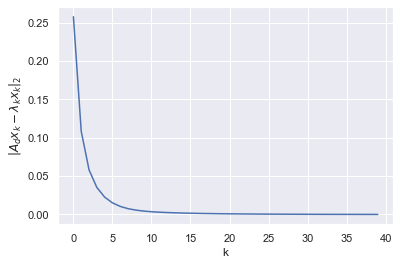

In [ ]:
plt.plot(list(range(len(res))), res)
plt.xlabel("k")
plt.ylabel("$\|A_dx_k - \lambda_k x_k\|_2$")

In [ ]:
l

0.9623531221277111

In [ ]:
top_authors = authors[np.argsort(x)[::-1][:10]]
for author in top_authors:
    print(author)

David E. Goldberg
Richard M. Karp
John E. Hopcroft
Azriel Rosenfeld
Ronald L. Rivest
Anil K. Jain
Takeo Kanade
Alfred V. Aho
Robert Endre Tarjan
Gerard Salton


В полученных списках ровно один общий автор - Anil K. Jain. Возможно такое различие в списке авторов связано с тем, что в PageRank учитывается не только количество ссылок (в данном случае цитирований), но и приоритет того автора, который процитровал какого-то другого автора

## Решение треугольных разреженных систем (30 pts)

В этой задаче рассмотрим более детально методы решения треугольных (нижне или верхне) линейных систем при условии, что матрицы этих систем разрежены. С этой задачей вы столкнётесь после того, как выполните разреженное LU разложение и получите желаемые *разреженные* треугольные факторы.

- (5 pts) Реализуйте классический метод решения треугольной линейной системы, однако учтите, что матрица у вас разреженная. Какой формат хранения разреженной матрицы будет предпочтительным для такого метода решения?

- (10 pts) В пункте выше не предполагались никакие специфичные свойства правой части. Однако если предположить, что правая часть является разреженным вектором, то можно предложить более эффективный метод решения такой линейной системы. Основная идея состоит в том, чтобы преобразовать метод из предыдущего пункта из построчного заполнения решения в итерирование по **столбцам** матрицы и соответствующего обновления решения. Какой формат хранения матриы является предпочтительным для такого метода решения? Перепишите метод из предыдущего пункта, так чтобы итерирование происходило по столбцам матрицы, и реализуйте его.

- (15 pts) Дальнейшим развитием является предположение, что помимо разреженной правой части **само решения** также является разреженным. В этом случае можно дополнительно ускорить метод, если рассматривать не все столбцы матрицы, а только те, что действительно влияют на заполненность решения. Для определения таких столбцов необходимо выяснить какие элементы решения окажутся ненулевыми, если в правой части есть ненулевой элемент на позиции $i$? Для ответа на этот вопрос вам поможет графовая интерпретация разреженной матрицы и понятие топологической сортировки. Реализуйте метод решения треугольной разреженной системы в таких предположениях.

- (10 pts) Проведите сравнение реализованных выше методов на разреженных треугольных (верхне и нижне) матрицах и правых частях удовлестворяющих перечисленным выше свойствам. Экспериментально проверьте, в каких случаях, какой метод является предпочтительным. Приведите теоретическую оценку сложности каждого из методов.

В данной задаче мы будем итерироваться по столбцам, и при этом в некоторых столбцах смотреть на ненулевые элементы, поэтому наиболее удобным форматом хранения матрицы является формат csc

In [ ]:
# Example of triangular sparse matrix generation
import numpy as np
import scipy.sparse as spsp
import scipy.sparse.linalg as spsplin
import matplotlib.pyplot as plt

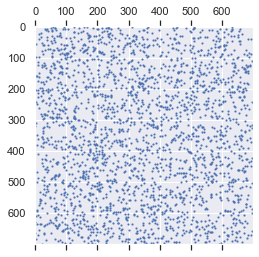

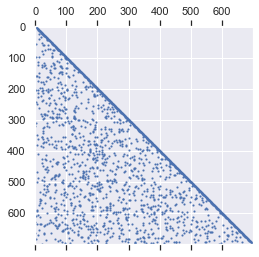

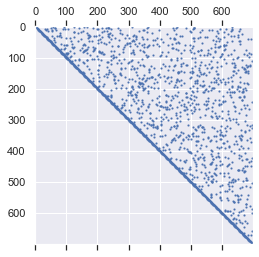

In [ ]:
n = 700
A = spsp.rand(n, n, density=0.005).tocsc()
plt.spy(A, markersize=1)
plt.show()
L = spsp.tril(A) + spsp.eye(n)
U = spsp.triu(A) + spsp.eye(n)
plt.spy(L, markersize=1)
plt.show()
plt.spy(U, markersize=1)
plt.show()

### 1).

In [ ]:
def lower_triangular_solver(A, f):
    
    L = A.copy()
    b = np.copy(f)
    L = L.tocsc()
    
    for i in range(len(L.indptr)-1):
        ind1 = L.indptr[i]
        ind2 = L.indptr[i+1]

        if ind1 == ind2:
            continue

        for j in range(ind1+1, ind2):
            b[L.indices[j]] -= b[L.indices[ind1]] * (L.data[j] / L.data[ind1])
            L.data[j] -= L.data[ind1] * (L.data[j] / L.data[ind1])


        b[L.indices[ind1]] /= L.data[ind1]
        L.data[ind1] = 1.
        
    return b

In [ ]:
x = np.random.rand(n)
b = L.dot(x)

In [ ]:
x1 = lower_triangular_solver(L, b)

In [ ]:
np.allclose(x, x1)

True

In [ ]:
def upper_triangular_solver(A, f):
    
    U = A.copy()
    b = np.copy(f)
    U = U.tocsc()
    
    for i in range(len(U.indptr)-1, 0, -1):
        ind1 = U.indptr[i]
        ind2 = U.indptr[i-1]

        if ind1 == ind2:
            continue

        for j in range(ind2, ind1-1):
            b[U.indices[j]] -= b[U.indices[ind1-1]] * (U.data[j] / U.data[ind1-1])
            U.data[j] -= U.data[ind1-1] * (U.data[j] / U.data[ind1-1])


        b[U.indices[ind1-1]] /= U.data[ind1-1]
        U.data[ind1-1] = 1.
        
    return b

In [ ]:
x = np.random.rand(n)
b = U.dot(x)

In [ ]:
x1 = upper_triangular_solver(U, b)

In [ ]:
np.allclose(x, x1)

True

### 2).

In [ ]:
def lower_triangular_solver2(A, f):
    
    L = A.copy()
    b = np.copy(f)
    L = L.tocsc()
    
    for i in range(len(L.indptr)-1):
        
        ind1 = L.indptr[i]
        ind2 = L.indptr[i+1]
        
        if b[L.indices[ind1]] == 0:
            continue

        if ind1 == ind2:
            continue

        for j in range(ind1+1, ind2):
            b[L.indices[j]] -= b[L.indices[ind1]] * (L.data[j] / L.data[ind1])
            L.data[j] -= L.data[ind1] * (L.data[j] / L.data[ind1])


        b[L.indices[ind1]] /= L.data[ind1]
        L.data[ind1] = 1.
        
    return b

In [ ]:
b = spsp.rand(1, n, density=0.005)

In [ ]:
b = b.toarray()[0]

In [ ]:
x = sp.sparse.linalg.spsolve(L, b)

In [ ]:
x1 = lower_triangular_solver2(L, b)

In [ ]:
np.allclose(x, x1)

True

In [ ]:
def upper_triangular_solver2(A, f):
    
    U = A.copy()
    b = np.copy(f)
    U = U.tocsc()
    
    for i in range(len(U.indptr)-1, 0, -1):
             
        ind1 = U.indptr[i]
        ind2 = U.indptr[i-1]
        
        if b[U.indices[ind1-1]] == 0:
            continue

        if ind1 == ind2:
            continue

        for j in range(ind2, ind1-1):
            b[U.indices[j]] -= b[U.indices[ind1-1]] * (U.data[j] / U.data[ind1-1])
            U.data[j] -= U.data[ind1-1] * (U.data[j] / U.data[ind1-1])


        b[U.indices[ind1-1]] /= U.data[ind1-1]
        U.data[ind1-1] = 1.
        
    return b

In [ ]:
x = sp.sparse.linalg.spsolve(U, b)

In [ ]:
x1 = upper_triangular_solver2(U, b)

In [ ]:
np.allclose(x, x1)

True

### 3).

In [ ]:
def dfs(cur, A, visited, top, res):
    visited[cur] = 1
    
    for i in range(A.indptr[cur], A.indptr[cur+1]):
        
        if visited[A.indices[i]] != 0:
            continue
           
        #print(cur)
        top = dfs(A.indices[i], A, visited, top, res)
        
    res[top] = cur
    top += 1
    return top

In [ ]:
def columns(A, b, res, visited):
    N = len(A.indptr) - 1
    
    top = 0
    
    for i in range(len(b)):
        
        #print(visited[b[i]])
        if visited[b[i]] != 0:
            continue
            
        top = dfs(b[i], A, visited, top, res)
        
    return top
        

In [ ]:
def lower_triangular_solver3(A, f):
    A = A.tocsc()
    b = np.where(f != 0)[0]
    res = np.zeros(A.shape[0])
    visited = np.zeros(len(A.data))
    top = columns(A, b, res, visited)
    x = np.copy(f)
    for i in range(top-1, -1, -1):
        j = res[i]
        x[int(j)] /= A.data[A.indptr[int(j)]]
        
        for p in range(A.indptr[int(j)]+1, A.indptr[int(j)+1]):
            x[A.indices[p]] -= A.data[p] * x[int(j)]
            
    return x

In [ ]:
b = spsp.rand(1, n, density=0.005)
b = b.toarray()[0]
x = sp.sparse.linalg.spsolve(L, b)

In [ ]:
x1 = lower_triangular_solver3(L, b)

In [ ]:
np.allclose(x, x1)

True

In [ ]:
def dfs1(cur, A, visited, top, res):
    visited[cur] = 1
    
    for i in range(A.indptr[cur+1]-1, A.indptr[cur]-1, -1):
        #print(A.indices[i])
        if visited[A.indices[i]] != 0:
            continue
           
        #print(cur)
        top = dfs1(A.indices[i], A, visited, top, res)
        
    res[top] = cur
    top += 1
    return top

In [ ]:
def columns1(A, b, res, visited):
    N = len(A.indptr) - 1
    
    top = 0
    
    for i in range(len(b)-1, -1, -1):
        
        #print(b[i])
        if int(visited[b[i]]) != 0:
            continue
            
        top = dfs1(b[i], A, visited, top, res)
        
    return top        

In [ ]:
def upper_triangular_solver3(A, f):
    A = A.tocsc()
    b = np.where(f != 0)[0]
    res = np.zeros(A.shape[0])
    visited = np.zeros(len(A.data))
    top = columns1(A, b, res, visited)
    x = np.copy(f)
    #print(x)
    for i in range(top-1, -1, -1):
        j = res[i]
        x[int(j)] /= A.data[A.indptr[int(j)+1]-1]
        #print(x[int(j)])
        for p in range(A.indptr[int(j)+1]-2, A.indptr[int(j)]-1, -1):
            #print(int(p))
            #print(x[int(j)])
            x[A.indices[p]] -= A.data[p] * x[int(j)]
            
    return x

In [ ]:
b = spsp.rand(1, n, density=0.005)
b = b.toarray()[0]
x = sp.sparse.linalg.spsolve(U, b)

In [ ]:
x1 = upper_triangular_solver3(U, b)

In [ ]:
np.allclose(x, x1)

True

### 4).

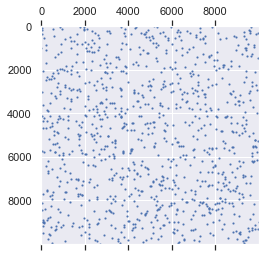

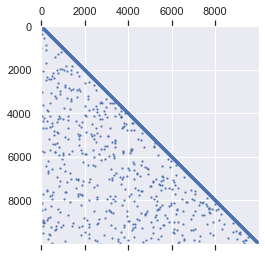

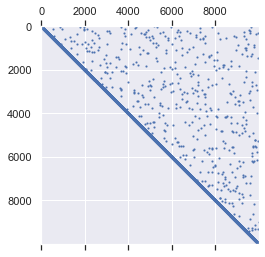

In [ ]:
n = 10000
A = spsp.rand(n, n, density=0.00001).tocsc()
plt.spy(A, markersize=1)
plt.show()
L = spsp.tril(A) + spsp.eye(n)
U = spsp.triu(A) + spsp.eye(n)
plt.spy(L, markersize=1)
plt.show()
plt.spy(U, markersize=1)
plt.show()

In [ ]:
x = np.random.rand(n)
b = L.dot(x)

In [ ]:
%%timeit
x1 = lower_triangular_solver(L, b)

31.2 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
x1 = lower_triangular_solver2(L, b)

36.6 ms ± 387 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
x1 = lower_triangular_solver3(L, b)

54.9 ms ± 857 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Видим, что время +- одинаковое в первых 2х методах, если правая часть не разреженая, что вполне логично, так как 2й метод работает быстрее 1го, если в правой части много нулей

3й метод работает чуть быстрее первых двух, так правая часть не разряженная и мы не получаем выгоду от использования dfs, наоборот он отнимает лишнее время

Теперь рассмторим случай с разряженой правой частью

In [ ]:
b = spsp.rand(1, n, density=0.00001)
b = b.toarray()[0]
x = sp.sparse.linalg.spsolve(L, b)

In [ ]:
%%timeit
x1 = lower_triangular_solver(L, b)

32.3 ms ± 839 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
x1 = lower_triangular_solver2(L, b)

7.46 ms ± 52.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
x1 = lower_triangular_solver3(L, b)

88.8 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Видно, если правая часть разреженая, то 2й метод работает существенно быстрее 1го, а 3й работает быстрее первых двух, что соответствует ожиданиям

#### Теоретические оценки

1й метод работает за $O(k)$, где $k$ - количество ненулевых элементов, так как мы проходим по каждому столбцу, а затем внутри столбца проходим все ненулевые элементы

2й метод работает также за $O(k)$, так как в худшем случае мы будем проходить все ненулевые элементы каждого столбца

3й метод работает за $O(N)$, где $N$ - количество строк (и столбцов) в исходной матрице, так как сначала мы делаем поиск в глубину в разреженом графе (это стоит $O(N)$), а затем заполняем вектор $x$, это также стоит $O(N)$